## BACKGROUND: 
From Alphabet Soup’s business team, Beks received a CSV containing more than 34,000 organizations that have received various amounts of funding from Alphabet Soup over the years. Within this dataset are a number of columns that capture metadata about each organization such as the following:

1. EIN and NAME—Identification columns
2. APPLICATION_TYPE—Alphabet Soup application type
3. AFFILIATION—Affiliated sector of industry
4. CLASSIFICATION—Government organization classification
5. USE_CASE—Use case for funding
6. ORGANIZATION—Organization type
7. STATUS—Active status
8. INCOME_AMT—Income classification
9. SPECIAL_CONSIDERATIONS—Special consideration for application
10. ASK_AMT—Funding amount requested
11. IS_SUCCESSFUL—Was the money used effectively

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
applicant_df = pd.read_csv('charity_data.csv')
applicant_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Questions to ask: 
1. What variable(s) are considered the target for your model?
Since we are to predict whether or not an applicant will be successful if funded by Alphabet Soup, we want to have the IS_SUCCESSFUL column as our target variable.

2. What variable(s) are considered to be the features for your model?
Other features (X variables) are 'EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION','USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT','SPECIAL_CONSIDERATIONS', and 'ASK_AMT.'
       
3. What variable(s) are neither and should be removed from the input data?
Since EIN and NAME columns have the same information, we will drop one, especially EIN as it can confuse the model with its nmerical units are different with the values in other columns.

## I. Inspect each column to decide which one to drop
<pre>
# To print number of rows and columns
df.shape

# To print names of columns
df.columns

# To print the data type for each column
df.dtypes

# Print how many null values there are for each column
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

# Print number of duplicates in the DataFrame
print(f"Duplicate entries: {df.duplicated().sum()}")

# Print the list of columns that have categorical data 
df.dtypes[df.dtypes == "object"].index.tolist()

# Print value counts for each column for bucketing
df.column.value_counts()

# Remove unncessary column
df.drop(columns=["Column"], inplace=True)
df.head()

</pre>


In [2]:
# Inspect the number of rows and columns
applicant_df.shape

(34299, 12)

In [3]:
applicant_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [4]:
# Types of each column
applicant_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Find any null values
for column in applicant_df.columns:
    print(f"Column {column} has {applicant_df[column].isnull().sum()} null values")

Column EIN has 0 null values
Column NAME has 0 null values
Column APPLICATION_TYPE has 0 null values
Column AFFILIATION has 0 null values
Column CLASSIFICATION has 0 null values
Column USE_CASE has 0 null values
Column ORGANIZATION has 0 null values
Column STATUS has 0 null values
Column INCOME_AMT has 0 null values
Column SPECIAL_CONSIDERATIONS has 0 null values
Column ASK_AMT has 0 null values
Column IS_SUCCESSFUL has 0 null values


In [6]:
# Print number of duplicates in the DataFrame
print(f"Duplicate entries: {applicant_df.duplicated().sum()}")

Duplicate entries: 0


In [7]:
# Generate our categorical variable list
applicant_cat = applicant_df.dtypes[applicant_df.dtypes == "object"].index.tolist()

In [8]:
# Check the number of unique values in each column
applicant_df[applicant_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [9]:
# Inspect columns that have more than 10 unique values in each categorical column
applicant_df.NAME.value_counts()

PARENT BOOSTER USA INC                                         1260
TOPS CLUB INC                                                   765
UNITED STATES BOWLING CONGRESS INC                              700
WASHINGTON STATE UNIVERSITY                                     492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                 408
                                                               ... 
HOPE MOMMIES INC                                                  1
SLCCC-PARENTS ADVISORY COUNCIL                                    1
INTERNL ASSN JEWISH GEN SOC WASHINGTON STATE JEWISH GEN SOC       1
WESTERN STATES STUDENT EXCHANGE INC                               1
UPPER KITTITAS COUNTY SNOWMOBILERS                                1
Name: NAME, Length: 19568, dtype: int64

### DROP UNNECESSARY COLUMNS
#### Since the name column is similar to EIN column which doesn't add much information in figuring out whether an applicant will be successful, we will drop it as well. 

In [10]:
# Remove unncessary columns
applicant_df.drop(columns=["EIN","NAME"], inplace=True)
applicant_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### BUCKETING
#### Now, moving on to the next categorical column "APPLICATION_TYPE" with its values and decide whether it needs bucketing.
#### Visualize the data to find the most common unique values if it needs bucketing. 

In [11]:
# Inspect APPLICATION_TYPE column
application_type_counts = applicant_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

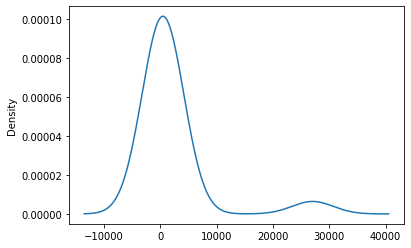

In [12]:
# Visualize APPLICATION_TYPE 
application_type_counts.plot.density()

#### Based on the density plot, any values less than 10,000 should be bucketed together. Once the APPLICATION_TYPE is bucketed, we will encode the categorical variables and merge the column to the original DataFrame. 

In [13]:
# Determine which values to replace
replace_apptype = list(application_type_counts[application_type_counts < 10000].index)

# Replace in DataFrame
for app_type in replace_apptype:
    applicant_df.APPLICATION_TYPE = applicant_df.APPLICATION_TYPE.replace(app_type,"Other")


# Check to make sure binning was successful
applicant_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     7262
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(applicant_df.APPLICATION_TYPE.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['APPLICATION_TYPE'])
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [15]:
# Merge the encode_df to the original DataFrame and Drop the original 'APPLICATION_TYPE' column
applicant_df = applicant_df.merge(encode_df,left_index=True,right_index=True).drop("APPLICATION_TYPE",1)

### ENCODE COLUMNS
#### Inspect the next column 'AFFILIATION' and encode the variables since they are less than 10 variables in the column. 

In [16]:
# Inspect affiliation values
affiliation_counts = applicant_df.AFFILIATION.value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [17]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(applicant_df.AFFILIATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['AFFILIATION'])
encode_df.head()

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
# Merge the encoded columns to the DataFrame and drop AFFILIATION column
applicant_df = applicant_df.merge(encode_df,left_index=True,right_index=True).drop("AFFILIATION",1)

In [20]:
applicant_df

,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,C1000,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,C3000,ProductDev,Association,1,0,N,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,C1000,ProductDev,Association,1,0,N,5000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34295,C3000,ProductDev,Association,1,0,N,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34296,C2000,Preservation,Association,1,0,N,5000,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,C3000,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
# Inspect classification values
classification_counts = applicant_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1245        1
C3700        1
C1283        1
C2570        1
C2190        1
Name: CLASSIFICATION, Length: 71, dtype: int64

#### Since the classification has more than 71 unique values with some values being more common than the rest. We will have to plot and bucket values. 

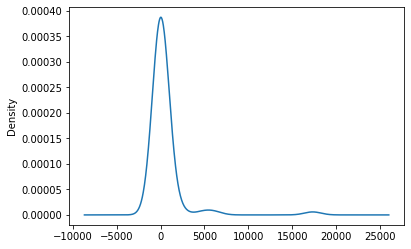

In [24]:
classification_counts.plot.density()

In [25]:
# Determine wich values to repace
replace_classification = list(classification_counts[classification_counts < 4000].index)

# Replace in DataFrame
for c in replace_classification:
    applicant_df.CLASSIFICATION = applicant_df.CLASSIFICATION.replace(c,"Other")


# Check to make sure binning was successful
applicant_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [26]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(applicant_df.CLASSIFICATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['CLASSIFICATION'])
encode_df.head()

,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_Other
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [28]:
# Merge the encoded columns to the DataFrame and drop CLASSIFICATION column
applicant_df = applicant_df.merge(encode_df,left_index=True,right_index=True).drop("CLASSIFICATION",1)
applicant_df

,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_Other
0,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ProductDev,Association,1,0,N,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Preservation,Trust,1,10000-24999,N,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,ProductDev,Association,1,0,N,5000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34295,ProductDev,Association,1,0,N,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,Preservation,Association,1,0,N,5000,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# Inspect USE_CASE column
use_case_counts = applicant_df.USE_CASE.value_counts()
use_case_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

#### Since there are only 5 variables in the USE_CASE column, we will encode the column. 

In [30]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(applicant_df.USE_CASE.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['USE_CASE'])
encode_df.head()

,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [31]:
# Merge the encoded columns to the DataFrame and drop USE_CASE column
applicant_df = applicant_df.merge(encode_df,left_index=True,right_index=True).drop("USE_CASE",1)
applicant_df

,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Co-operative,1,1-9999,N,108590,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Association,1,0,N,5000,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Trust,1,10000-24999,N,6692,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Trust,1,100000-499999,N,142590,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,Association,1,0,N,5000,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,Association,1,0,N,5000,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
34296,Association,1,0,N,5000,0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
# Inspect ORGANIZATION column
organization_counts = applicant_df.ORGANIZATION.value_counts()
organization_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [34]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(applicant_df.ORGANIZATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['ORGANIZATION'])
encode_df.head()

,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [35]:
# Merge the encoded columns to the DataFrame and drop ORGANIZATION column
applicant_df = applicant_df.merge(encode_df,left_index=True,right_index=True).drop("ORGANIZATION",1)
applicant_df

,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,N,5000,1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,1-9999,N,108590,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,N,5000,0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,10000-24999,N,6692,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,100000-499999,N,142590,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,0,N,5000,0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34295,1,0,N,5000,0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34296,1,0,N,5000,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
34297,1,0,N,5000,1,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [37]:
# Inspect STATUS column
status_counts= applicant_df.STATUS.value_counts()
status_counts

1    34294
0        5
Name: STATUS, dtype: int64

In [38]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(applicant_df.STATUS.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['STATUS'])
encode_df.head()

,STATUS_0,STATUS_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [39]:
# Merge the encoded columns to the DataFrame and drop STATUS column
applicant_df = applicant_df.merge(encode_df,left_index=True,right_index=True).drop("STATUS",1)
applicant_df

,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,STATUS_0,STATUS_1
0,0,N,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1-9999,N,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,N,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,10000-24999,N,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,100000-499999,N,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,N,5000,0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
34295,0,N,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
34296,0,N,5000,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
34297,0,N,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [40]:
# Inspect INCOME_AMT column
income_amt_counts = applicant_df.INCOME_AMT.value_counts()
income_amt_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [41]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(applicant_df.INCOME_AMT.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['INCOME_AMT'])
encode_df.head()

,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Merge the encoded columns to the DataFrame and drop INCOME_AMT column
applicant_df = applicant_df.merge(encode_df,left_index=True,right_index=True).drop("INCOME_AMT",1)

In [43]:
applicant_df

,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,...,STATUS_1,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,N,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,N,5000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,N,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,N,5000,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,N,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Inspect SPECIAL_CONSIDERATIONS column
special_counts = applicant_df.SPECIAL_CONSIDERATIONS.value_counts()
special_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [45]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(applicant_df.SPECIAL_CONSIDERATIONS.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['SPECIAL_CONSIDERATIONS'])
encode_df.head()

,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [46]:
# Merge the encoded columns to the DataFrame and drop SPECIAL_CONSIDERATIONS column
applicant_df = applicant_df.merge(encode_df,left_index=True,right_index=True).drop("SPECIAL_CONSIDERATIONS",1)

In [47]:
applicant_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,5000,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
# Inspect ASK_AMT column
ask_amt_counts = applicant_df.ASK_AMT.value_counts()

In [49]:
ask_amt_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

#### Plot the ASK_AMT data to see if the numerical values are worth to keep (if there's not a common value, we can keep the column)

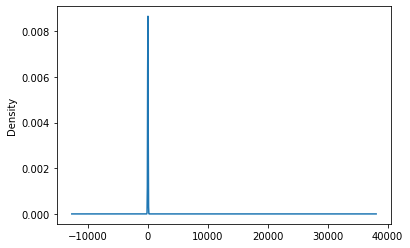

In [50]:
ask_amt_counts.plot.density()

#### According to the plot, it looks like a certain number appears more often (e.g., 5000) so we will delete the column.

In [52]:
applicant_df.drop(columns=["ASK_AMT"], inplace=True)

In [53]:
applicant_df

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### ENCODE output column 'IS_SUCCESSFUL'

In [54]:
successful_counts = applicant_df.IS_SUCCESSFUL.value_counts()
successful_counts

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [55]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(applicant_df.IS_SUCCESSFUL.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['IS_SUCCESSFUL'])
encode_df.head()

,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [56]:
# Merge adn drop the original column 
applicant_df = applicant_df.merge(encode_df,left_index=True,right_index=True).drop("IS_SUCCESSFUL",1)

In [57]:
applicant_df

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34295,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34296,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34297,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## DOUBLE CHECK THE TYPES OF COLUMNS

In [58]:
applicant_df.dtypes

APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T3             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64
ORGANIZATION_Corporation        float64
ORGANIZATION_Trust              float64
STATUS_0                        float64
STATUS_1                        float64
INCOME_AMT_0                    float64
INCOME_AMT_1-9999               float64


## II. READY FOR MACHINE LEARNING: split into training & test datasets

In [62]:
# We only need to keep one of the IS_SUCCESSFUL columns since either one will tell us the output. 
y = applicant_df["IS_SUCCESSFUL_0"].values
X = applicant_df.drop(["IS_SUCCESSFUL_0","IS_SUCCESSFUL_1"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## III. Standardize the numerical values before fitting

In [63]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## IV. Design a deep learning model using Tensorflow

In [65]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 280       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


### We have several weight parameters for the model. Weight parameters are calculated as # of input values times # of neurons + 1 bias term for each neuron. So we have 34 input values, 8 neurons and 8 bias terms give 280. Then, the second layer has 8 neurons as input values times 5 neurons plus 5 would give 45 weight parameters. 

## V. Compile the model for the binary classification

In [66]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## VI. Train the model

In [67]:
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 10s 399us/sample - loss: 0.6227 - accuracy: 0.6802
Epoch 2/100
25724/25724 [==============================] - 8s 315us/sample - loss: 0.5957 - accuracy: 0.7010
Epoch 3/100
25724/25724 [==============================] - 10s 385us/sample - loss: 0.5900 - accuracy: 0.7049
Epoch 4/100
25724/25724 [==============================] - 6s 227us/sample - loss: 0.5877 - accuracy: 0.7088
Epoch 5/100
25724/25724 [==============================] - 7s 284us/sample - loss: 0.5856 - accuracy: 0.7095
Epoch 6/100
25724/25724 [==============================] - 4s 154us/sample - loss: 0.5848 - accuracy: 0.7098
Epoch 7/100
25724/25724 [==============================] - 4s 138us/sample - loss: 0.5837 - accuracy: 0.7110
Epoch 8/100
25724/25724 [==============================] - 4s 154us/sample - loss: 0.5831 - accuracy: 0.7108
Epoch 9/100
25724/25724 [==============================] - 4s 143us/sample - loss: 0.5826 - accuracy: 0

25724/25724 [==============================] - 12s 459us/sample - loss: 0.5768 - accuracy: 0.7150- loss: 0.5783 - accuracy: 0. - ETA: 2s - - ETA: 2s - loss: 0.5776 - accura - ETA: 2s - loss: 0.5778 - accuracy - ETA:  - ETA
Epoch 76/100
25724/25724 [==============================] - 14s 538us/sample - loss: 0.5770 - accuracy: 0.7143
Epoch 77/100
25724/25724 [==============================] - 7s 281us/sample - loss: 0.5770 - accuracy: 0.7151
Epoch 78/100
25724/25724 [==============================] - 4s 149us/sample - loss: 0.5768 - accuracy: 0.7145
Epoch 79/100
25724/25724 [==============================] - 4s 150us/sample - loss: 0.5771 - accuracy: 0.7148
Epoch 80/100
25724/25724 [==============================] - 4s 156us/sample - loss: 0.5772 - accuracy: 0.7140
Epoch 81/100
25724/25724 [==============================] - 3s 135us/sample - loss: 0.5767 - accuracy: 0.7147
Epoch 82/100
25724/25724 [==============================] - 4s 148us/sample - loss: 0.5767 - accuracy: 0.7154
Epoch 

## VII. Evaluate the model’s performance by testing the prediction on testing dataset

In [68]:
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 2s - loss: 0.5883 - accuracy: 0.7041
Loss: 0.5835321262557027, Accuracy: 0.7041399478912354


## Result
The current model has 70% of accuracy with a loss of 58%. In order to increase the optimization, we can use the following methods.
- Check out your input dataset.
- Add more neurons to a hidden layer.
- Add additional hidden layers.
- Use a different activation function for the hidden layers.
- Add additional epochs to the training regimen.


The risk of adding more epochs is that the model can  produce weight coefficients that are too effective, which can lead to overfitting. We've tried changing the activation function in the output layer but it returned less accuracy so we removed that.

## VIII. Add more neurons and increase epochs

In [71]:
# Define another model
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                840       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

Train on 25724 samples
Epoch 1/200
25724/25724 [==============================] - 8s 318us/sample - loss: 0.6146 - accuracy: 0.6810
Epoch 2/200
25724/25724 [==============================] - 9s 363us/sample - loss: 0.5886 - accuracy: 0.7072
Epoch 3/200
25724/25724 [==============================] - 5s 187us/sample - loss: 0.5834 - accuracy: 0.7101
Epoch 4/200
25724/25724 [==============================] - 4s 172us/sample - loss: 0.5807 - accuracy: 0.7102
Epoch 5/200
25724/25724 [==============================] - 4s 147us/sample - loss: 0.5793 - accuracy: 0.7116
Epoch 6/200
25724/25724 [==============================] - 4s 155us/sample - loss: 0.5787 - accuracy: 0.7110
Epoch 7/200
25724/25724 [==============================] - 7s 256us/sample - loss: 0.5778 - accuracy: 0.7119
Epoch 8/200
25724/25724 [==============================] - 8s 310us/sample - loss: 0.5773 - accuracy: 0.7125
Epoch 9/200
25724/25724 [==============================] - 7s 282us/sample - loss: 0.5768 - accuracy: 0.7

25724/25724 [==============================] - 5s 209us/sample - loss: 0.5701 - accuracy: 0.7176
Epoch 75/200
25724/25724 [==============================] - 5s 206us/sample - loss: 0.5700 - accuracy: 0.7187
Epoch 76/200
25724/25724 [==============================] - 4s 166us/sample - loss: 0.5702 - accuracy: 0.7181
Epoch 77/200
25724/25724 [==============================] - 5s 185us/sample - loss: 0.5700 - accuracy: 0.7173
Epoch 78/200
25724/25724 [==============================] - 4s 169us/sample - loss: 0.5701 - accuracy: 0.7187
Epoch 79/200
25724/25724 [==============================] - 5s 194us/sample - loss: 0.5702 - accuracy: 0.7183
Epoch 80/200
25724/25724 [==============================] - 4s 171us/sample - loss: 0.5698 - accuracy: 0.7190
Epoch 81/200
25724/25724 [==============================] - 4s 172us/sample - loss: 0.5696 - accuracy: 0.7182
Epoch 82/200
25724/25724 [==============================] - 5s 177us/sample - loss: 0.5699 - accuracy: 0.7191
Epoch 83/200
25724/2572

25724/25724 [==============================] - 9s 332us/sample - loss: 0.5684 - accuracy: 0.7193
Epoch 148/200
25724/25724 [==============================] - 9s 357us/sample - loss: 0.5687 - accuracy: 0.7195
Epoch 149/200
25724/25724 [==============================] - 9s 336us/sample - loss: 0.5685 - accuracy: 0.7194
Epoch 150/200
25724/25724 [==============================] - 8s 322us/sample - loss: 0.5683 - accuracy: 0.7196
Epoch 151/200
25724/25724 [==============================] - 8s 326us/sample - loss: 0.5685 - accuracy: 0.7194
Epoch 152/200
25724/25724 [==============================] - 6s 234us/sample - loss: 0.5685 - accuracy: 0.7192
Epoch 153/200
25724/25724 [==============================] - 6s 236us/sample - loss: 0.5684 - accuracy: 0.7192
Epoch 154/200
25724/25724 [==============================] - 7s 257us/sample - loss: 0.5685 - accuracy: 0.7192
Epoch 155/200
25724/25724 [==============================] - 6s 235us/sample - loss: 0.5685 - accuracy: 0.7191
Epoch 156/200
2

In [73]:
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 2s - loss: 0.5697 - accuracy: 0.7065
Loss: 0.5853753918322461, Accuracy: 0.7064722776412964


## IX. Change activation function

In [74]:
# Define another model
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 280       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 8s 298us/sample - loss: 0.6219 - accuracy: 0.6847
Epoch 2/100
25724/25724 [==============================] - 7s 269us/sample - loss: 0.6048 - accuracy: 0.6909
Epoch 3/100
25724/25724 [==============================] - 6s 249us/sample - loss: 0.5989 - accuracy: 0.6976
Epoch 4/100
25724/25724 [==============================] - 8s 319us/sample - loss: 0.5947 - accuracy: 0.6989
Epoch 5/100
25724/25724 [==============================] - 8s 315us/sample - loss: 0.5914 - accuracy: 0.7026
Epoch 6/100
25724/25724 [==============================] - 8s 310us/sample - loss: 0.5888 - accuracy: 0.7034
Epoch 7/100
25724/25724 [==============================] - 7s 256us/sample - loss: 0.5875 - accuracy: 0.7039
Epoch 8/100
25724/25724 [==============================] - 7s 271us/sample - loss: 0.5861 - accuracy: 0.7063
Epoch 9/100
25724/25724 [==============================] - 9s 345us/sample - loss: 0.5855 - accuracy: 0.7

25724/25724 [==============================] - 9s 332us/sample - loss: 0.5755 - accuracy: 0.7143
Epoch 75/100
25724/25724 [==============================] - 8s 296us/sample - loss: 0.5751 - accuracy: 0.7142
Epoch 76/100
25724/25724 [==============================] - 6s 243us/sample - loss: 0.5751 - accuracy: 0.7147
Epoch 77/100
25724/25724 [==============================] - 6s 226us/sample - loss: 0.5750 - accuracy: 0.7139
Epoch 78/100
25724/25724 [==============================] - 6s 224us/sample - loss: 0.5752 - accuracy: 0.7138
Epoch 79/100
25724/25724 [==============================] - 6s 232us/sample - loss: 0.5751 - accuracy: 0.7143
Epoch 80/100
25724/25724 [==============================] - 6s 227us/sample - loss: 0.5751 - accuracy: 0.7142
Epoch 81/100
25724/25724 [==============================] - 6s 229us/sample - loss: 0.5751 - accuracy: 0.7139
Epoch 82/100
25724/25724 [==============================] - 6s 233us/sample - loss: 0.5750 - accuracy: 0.7145
Epoch 83/100
25724/2572

In [76]:
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5720 - accuracy: 0.7044
Loss: 0.584293837324871, Accuracy: 0.7043731808662415
